In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
import requests #for http requests
import pandas  #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy
import en_core_web_sm
# en_core_web_sm.load()

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [2]:
df10 = pandas.read_csv('t\df_10.csv', index_col=0)
df00 = pandas.read_csv('t\df_00.csv', index_col=0)
df90 = pandas.read_csv('t\df_90.csv', index_col=0)
df80 = pandas.read_csv('t\df_80.csv', index_col=0)
df70 = pandas.read_csv('t\df_70.csv', index_col=0)

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [5]:
abstract70 = ''. join(df70['AB'])
len(abstract70)

127513

In [6]:
abstract80 = ''. join(df80['AB'])[:127513]

In [7]:
abstract90 = ''. join(df90['AB'])[:127513]

In [8]:
abstract00 = ''. join(df90['AB'])[:127513]

In [9]:
abstract10 = ''. join(df00['AB'])[:127513]

In [10]:
# tokenize 
token70 = word_tokenize(abstract70)

In [11]:
# tokenize 
token80 = word_tokenize(abstract80)

In [12]:
# tokenize 
token90 = word_tokenize(abstract90)

In [13]:
# tokenize 
token00 = word_tokenize(abstract00)

In [14]:
# tokenize 
token10 = word_tokenize(abstract10)

In [15]:
# save in a DF 
df70['tokenized_text'] = df70['AB'].apply(lambda x: word_tokenize(x))
df70['word_counts'] = df70['tokenized_text'].apply(lambda x: len(x))

df80['tokenized_text'] = df80['AB'].apply(lambda x: word_tokenize(x))
df80['word_counts'] = df80['tokenized_text'].apply(lambda x: len(x))

df90['tokenized_text'] = df90['AB'].apply(lambda x: word_tokenize(x))
df90['word_counts'] = df90['tokenized_text'].apply(lambda x: len(x))

df00['tokenized_text'] = df00['AB'].apply(lambda x: word_tokenize(x))
df00['word_counts'] = df00['tokenized_text'].apply(lambda x: len(x))

df10['tokenized_text'] = df10['AB'].apply(lambda x: word_tokenize(x))
df10['word_counts'] = df10['tokenized_text'].apply(lambda x: len(x))

In [16]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [17]:
norm70 = normalizeTokens(token70)

In [18]:
norm80 = normalizeTokens(token80)

In [19]:
norm90 = normalizeTokens(token90)

In [20]:
norm00 = normalizeTokens(token00)

In [21]:
norm10 = normalizeTokens(token10)

In [22]:
# save in DF
df70['normalized_tokens'] = df70['tokenized_text'].apply(lambda x: normalizeTokens(x))
df70['normalized_tokens_count'] = df70['normalized_tokens'].apply(lambda x: len(x))

df80['normalized_tokens'] = df80['tokenized_text'].apply(lambda x: normalizeTokens(x))
df80['normalized_tokens_count'] = df80['normalized_tokens'].apply(lambda x: len(x))

df90['normalized_tokens'] = df90['tokenized_text'].apply(lambda x: normalizeTokens(x))
df90['normalized_tokens_count'] = df90['normalized_tokens'].apply(lambda x: len(x))

df00['normalized_tokens'] = df00['tokenized_text'].apply(lambda x: normalizeTokens(x))
df00['normalized_tokens_count'] = df00['normalized_tokens'].apply(lambda x: len(x))

df10['normalized_tokens'] = df10['tokenized_text'].apply(lambda x: normalizeTokens(x))
df10['normalized_tokens_count'] = df10['normalized_tokens'].apply(lambda x: len(x))

#### Lexical Dispersion Plots

In [23]:
import nltk

In [24]:
ab70 = nltk.Text(token70)
ab80 = nltk.Text(token80)
ab90 = nltk.Text(token90)
ab00 = nltk.Text(token00)

In [25]:
ab10 = nltk.Text(token10)

I am interested in exploring how perspectives about attributes of health have changed across dimensions.` 

C:\Users\Yoojin\Anaconda1\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Yoojin\Anaconda1\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Yoojin\Anaconda1\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Yoojin\Anaconda1\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Yoojin\Anaconda1\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was depr

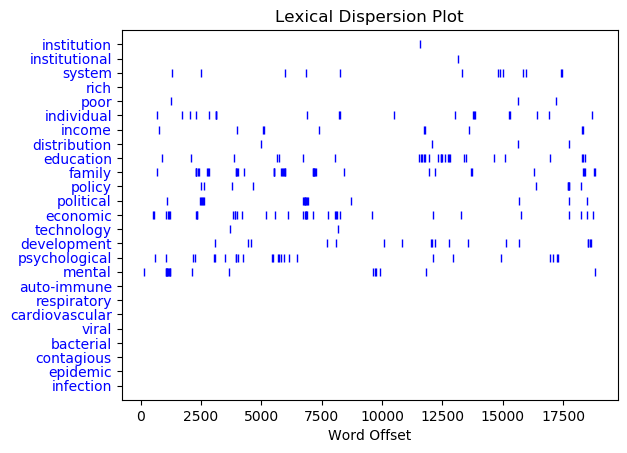

In [26]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ab70.dispersion_plot(['institution', 'institutional', 'system', 'rich', 'poor', 'individual', 'income', 'distribution', 'education','family', 'policy', 'political', 'economic', 'technology', 'development', 'psychological', 'mental','auto-immune', 'respiratory', 'cardiovascular', 'viral', 'bacterial', 'contagious', 'epidemic', 'infection'])
sns.set() #Re-enabling seaborn

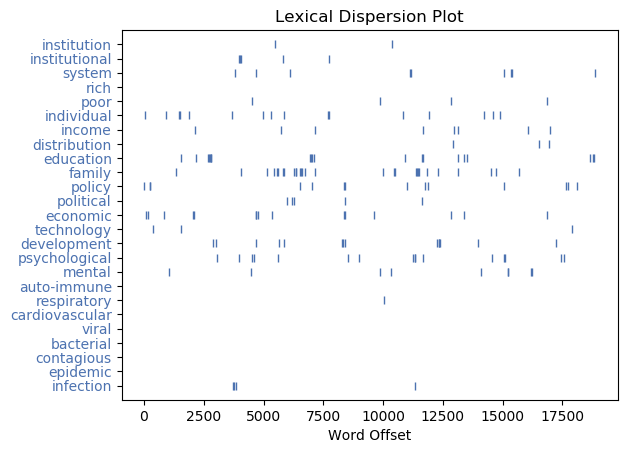

In [27]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ab80.dispersion_plot(['institution', 'institutional', 'system', 'rich', 'poor', 'individual', 'income', 'distribution', 'education','family', 'policy', 'political', 'economic', 'technology', 'development', 'psychological', 'mental','auto-immune', 'respiratory', 'cardiovascular', 'viral', 'bacterial', 'contagious', 'epidemic', 'infection'])
sns.set() #Re-enabling seaborn

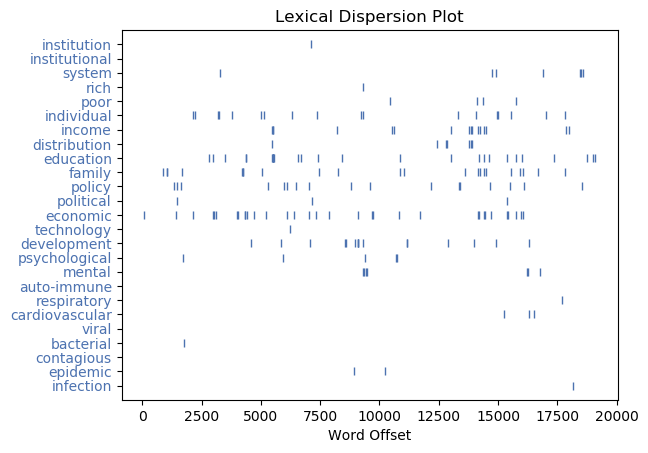

In [28]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ab90.dispersion_plot(['institution', 'institutional', 'system', 'rich', 'poor', 'individual', 'income', 'distribution', 'education','family', 'policy', 'political', 'economic', 'technology', 'development', 'psychological', 'mental','auto-immune', 'respiratory', 'cardiovascular', 'viral', 'bacterial', 'contagious', 'epidemic', 'infection'])
sns.set() #Re-enabling seaborn

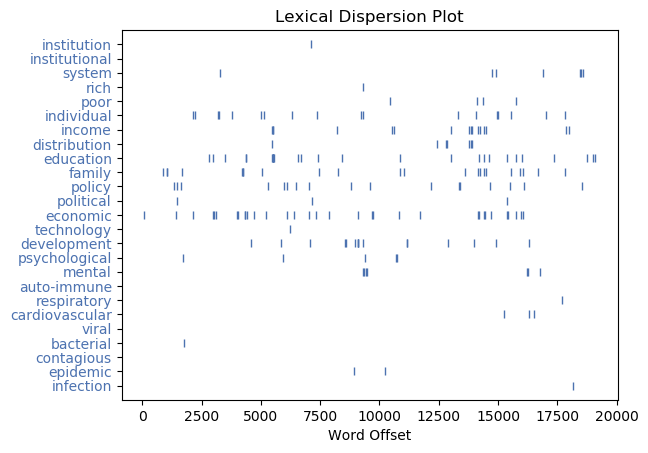

In [29]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ab00.dispersion_plot(['institution', 'institutional', 'system', 'rich', 'poor', 'individual', 'income', 'distribution', 'education','family', 'policy', 'political', 'economic', 'technology', 'development', 'psychological', 'mental','auto-immune', 'respiratory', 'cardiovascular', 'viral', 'bacterial', 'contagious', 'epidemic', 'infection'])
sns.set() #Re-enabling seaborn

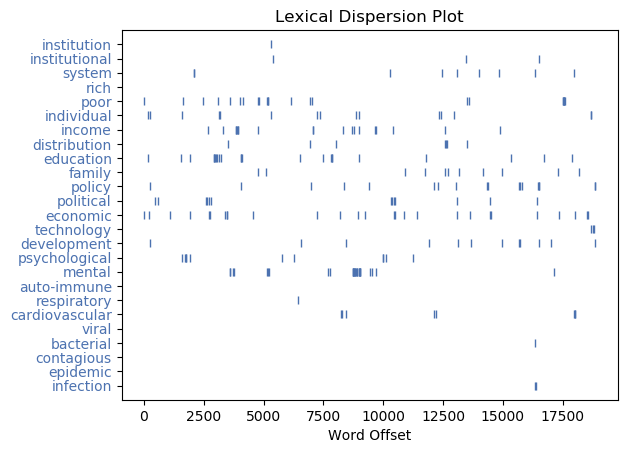

In [30]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
ab10.dispersion_plot(['institution', 'institutional', 'system', 'rich', 'poor', 'individual', 'income', 'distribution', 'education','family', 'policy', 'political', 'economic', 'technology', 'development', 'psychological', 'mental','auto-immune', 'respiratory', 'cardiovascular', 'viral', 'bacterial', 'contagious', 'epidemic', 'infection'])
sns.set() #Re-enabling seaborn

#### Distributional Difference

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The scipy.stats.entropy() function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides scipy.special.kl_div() which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$.

This is also noncommutative, and the code can be drawn directly from scipy.
Kolmogorov-Smirnov

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.
Wasserstein Distance

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.

In [31]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == 'JS':
        return js(P,Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [32]:
# define a new year variable for later analysis and save it separately for efficiency
def year(row):
    if  row['YY'] < 1980: # there is one article published in 1968 and will be included here 
        return "1970"
    elif row['YY'] < 1990:
        return "1980"
    elif row['YY'] < 2000:
        return "1990"
    elif row['YY'] < 2010:
        return "2000"
    elif row['YY'] < 2020:
        return "2010"
    else: return "2020"

In [33]:
df70 = df70.sample(25, replace = True)
df80 = df80.sample(25, replace = True)
df90 = df90.sample(25, replace = True)
df00 = df00.sample(25, replace = True)
df10 = df10.sample(25, replace = True)

In [34]:
df70['year'] = df70.apply(lambda x: year(x), axis=1)
df80['year'] = df80.apply(lambda x: year(x), axis=1)
df90['year'] = df90.apply(lambda x: year(x), axis=1)
df00['year'] = df00.apply(lambda x: year(x), axis=1)
df10['year'] = df10.apply(lambda x: year(x), axis=1)

In [35]:
import pandas as pd
df = pd.concat([df70, df80, df90, df00, df10])
df78 = pd.concat([df70, df80])
df89 = pd.concat([df80, df90])
df90 = pd.concat([df90, df00])
df01 = pd.concat([df00, df10])

In [36]:
df['tokenized_text'] = df['AB'].apply(lambda x: word_tokenize(x))
df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [37]:
df78['tokenized_text'] = df78['AB'].apply(lambda x: word_tokenize(x))
df78['normalized_tokens'] = df78['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [38]:
df89['tokenized_text'] = df89['AB'].apply(lambda x: word_tokenize(x))
df89['normalized_tokens'] = df89['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [39]:
df90['tokenized_text'] = df90['AB'].apply(lambda x: word_tokenize(x))
df90['normalized_tokens'] = df90['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [40]:
df01['tokenized_text'] = df01['AB'].apply(lambda x: word_tokenize(x))
df01['normalized_tokens'] = df01['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [41]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

In [42]:
corpora = list(df['normalized_tokens'])

In [46]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

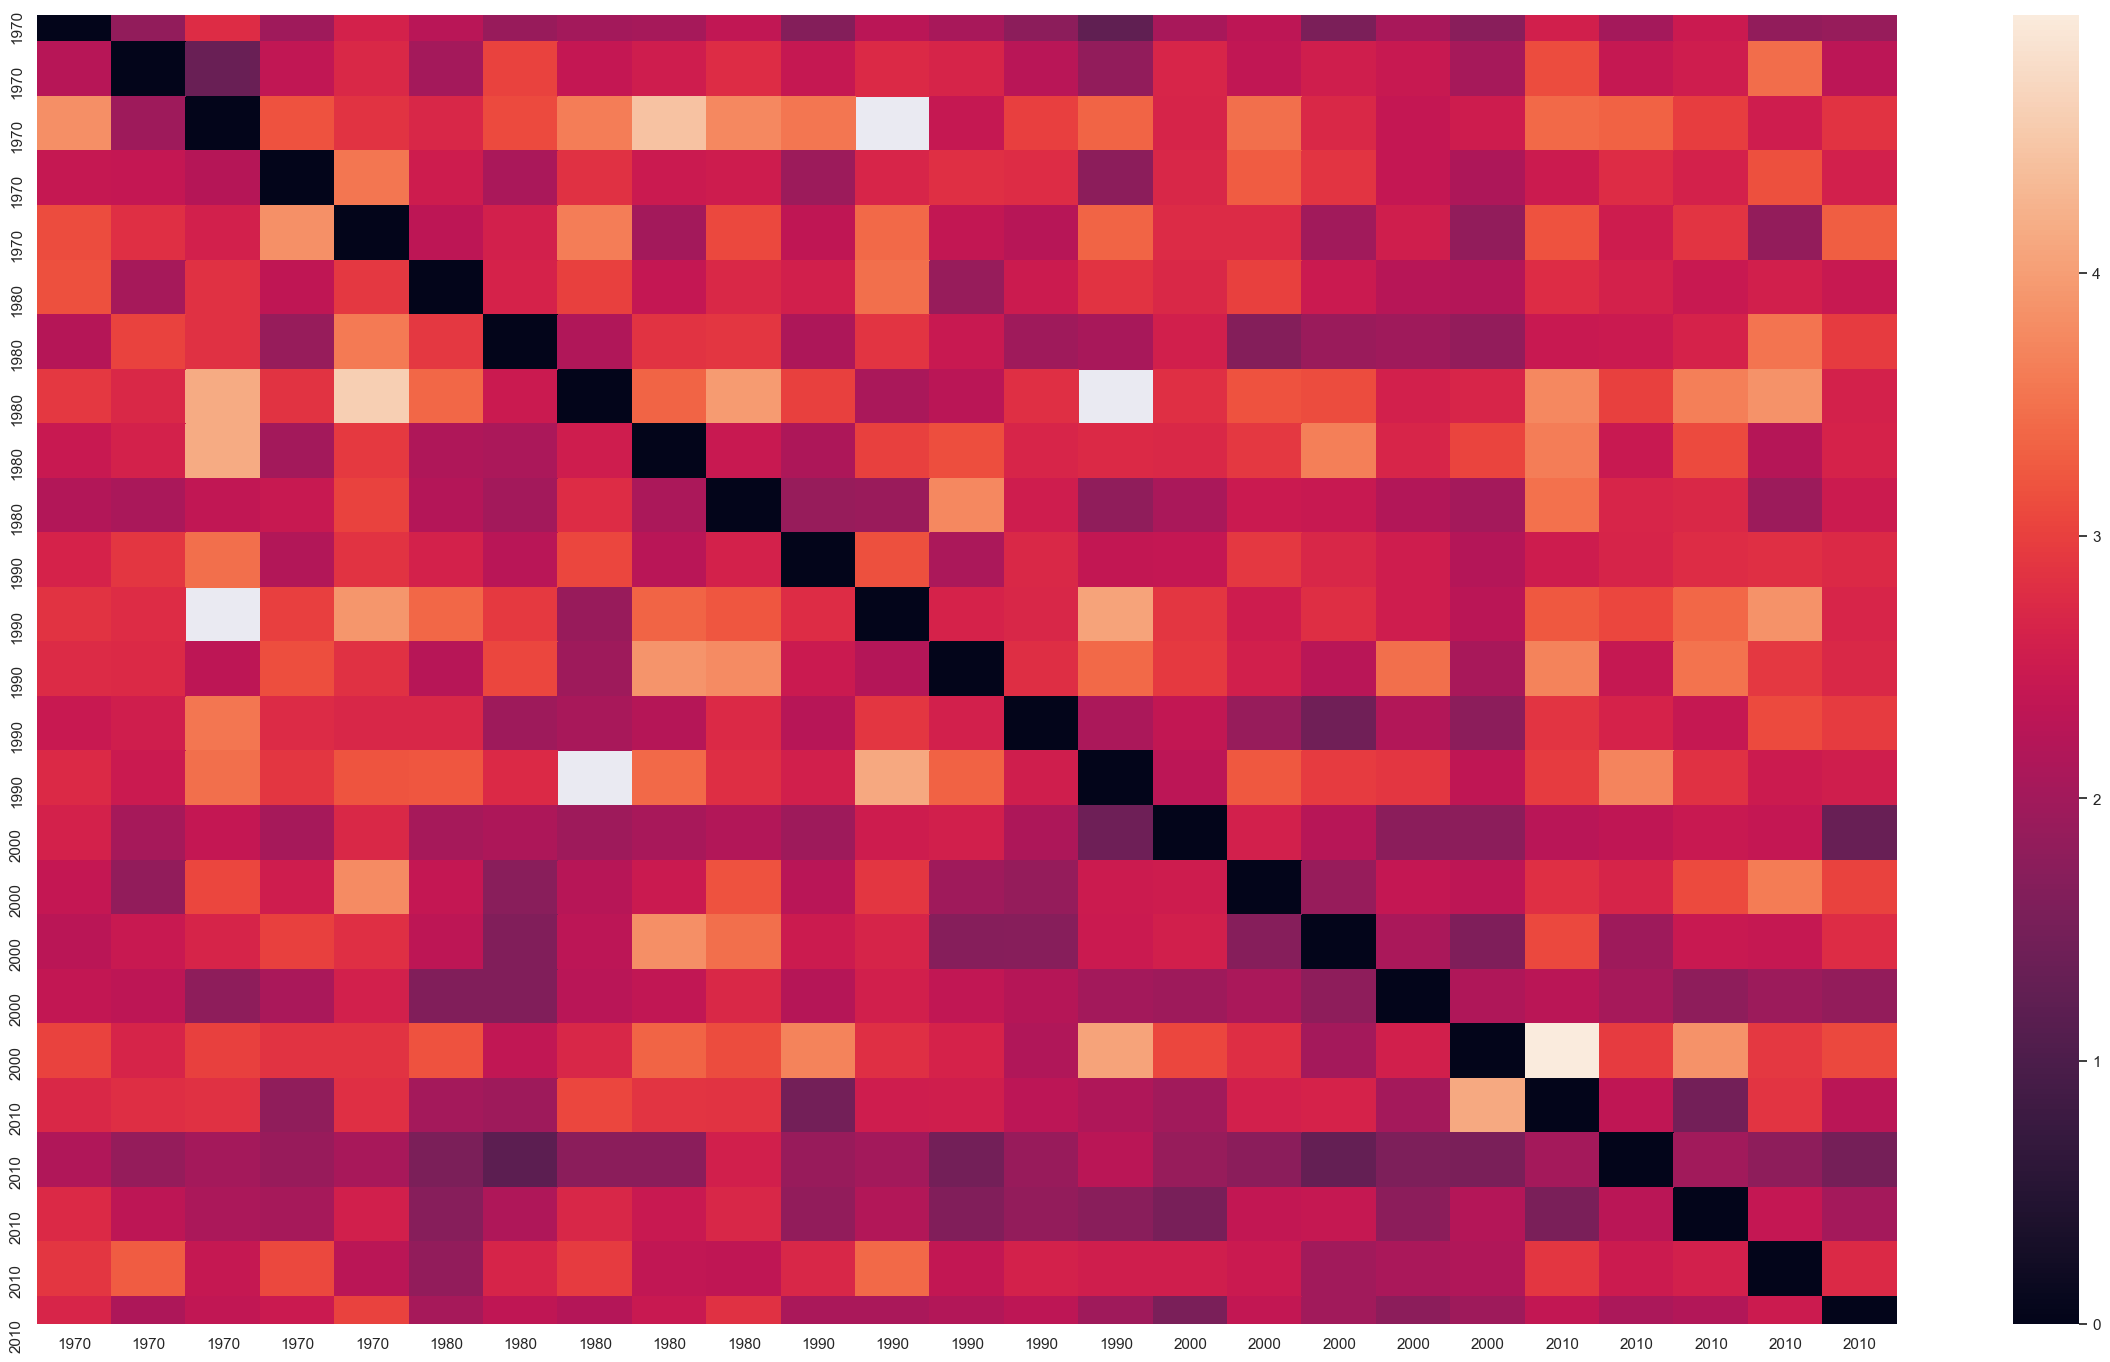

In [47]:
from pylab import rcParams

# visualize KL divergence
rcParams['figure.figsize'] = 30, 17

fileids = list(df['year'])
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

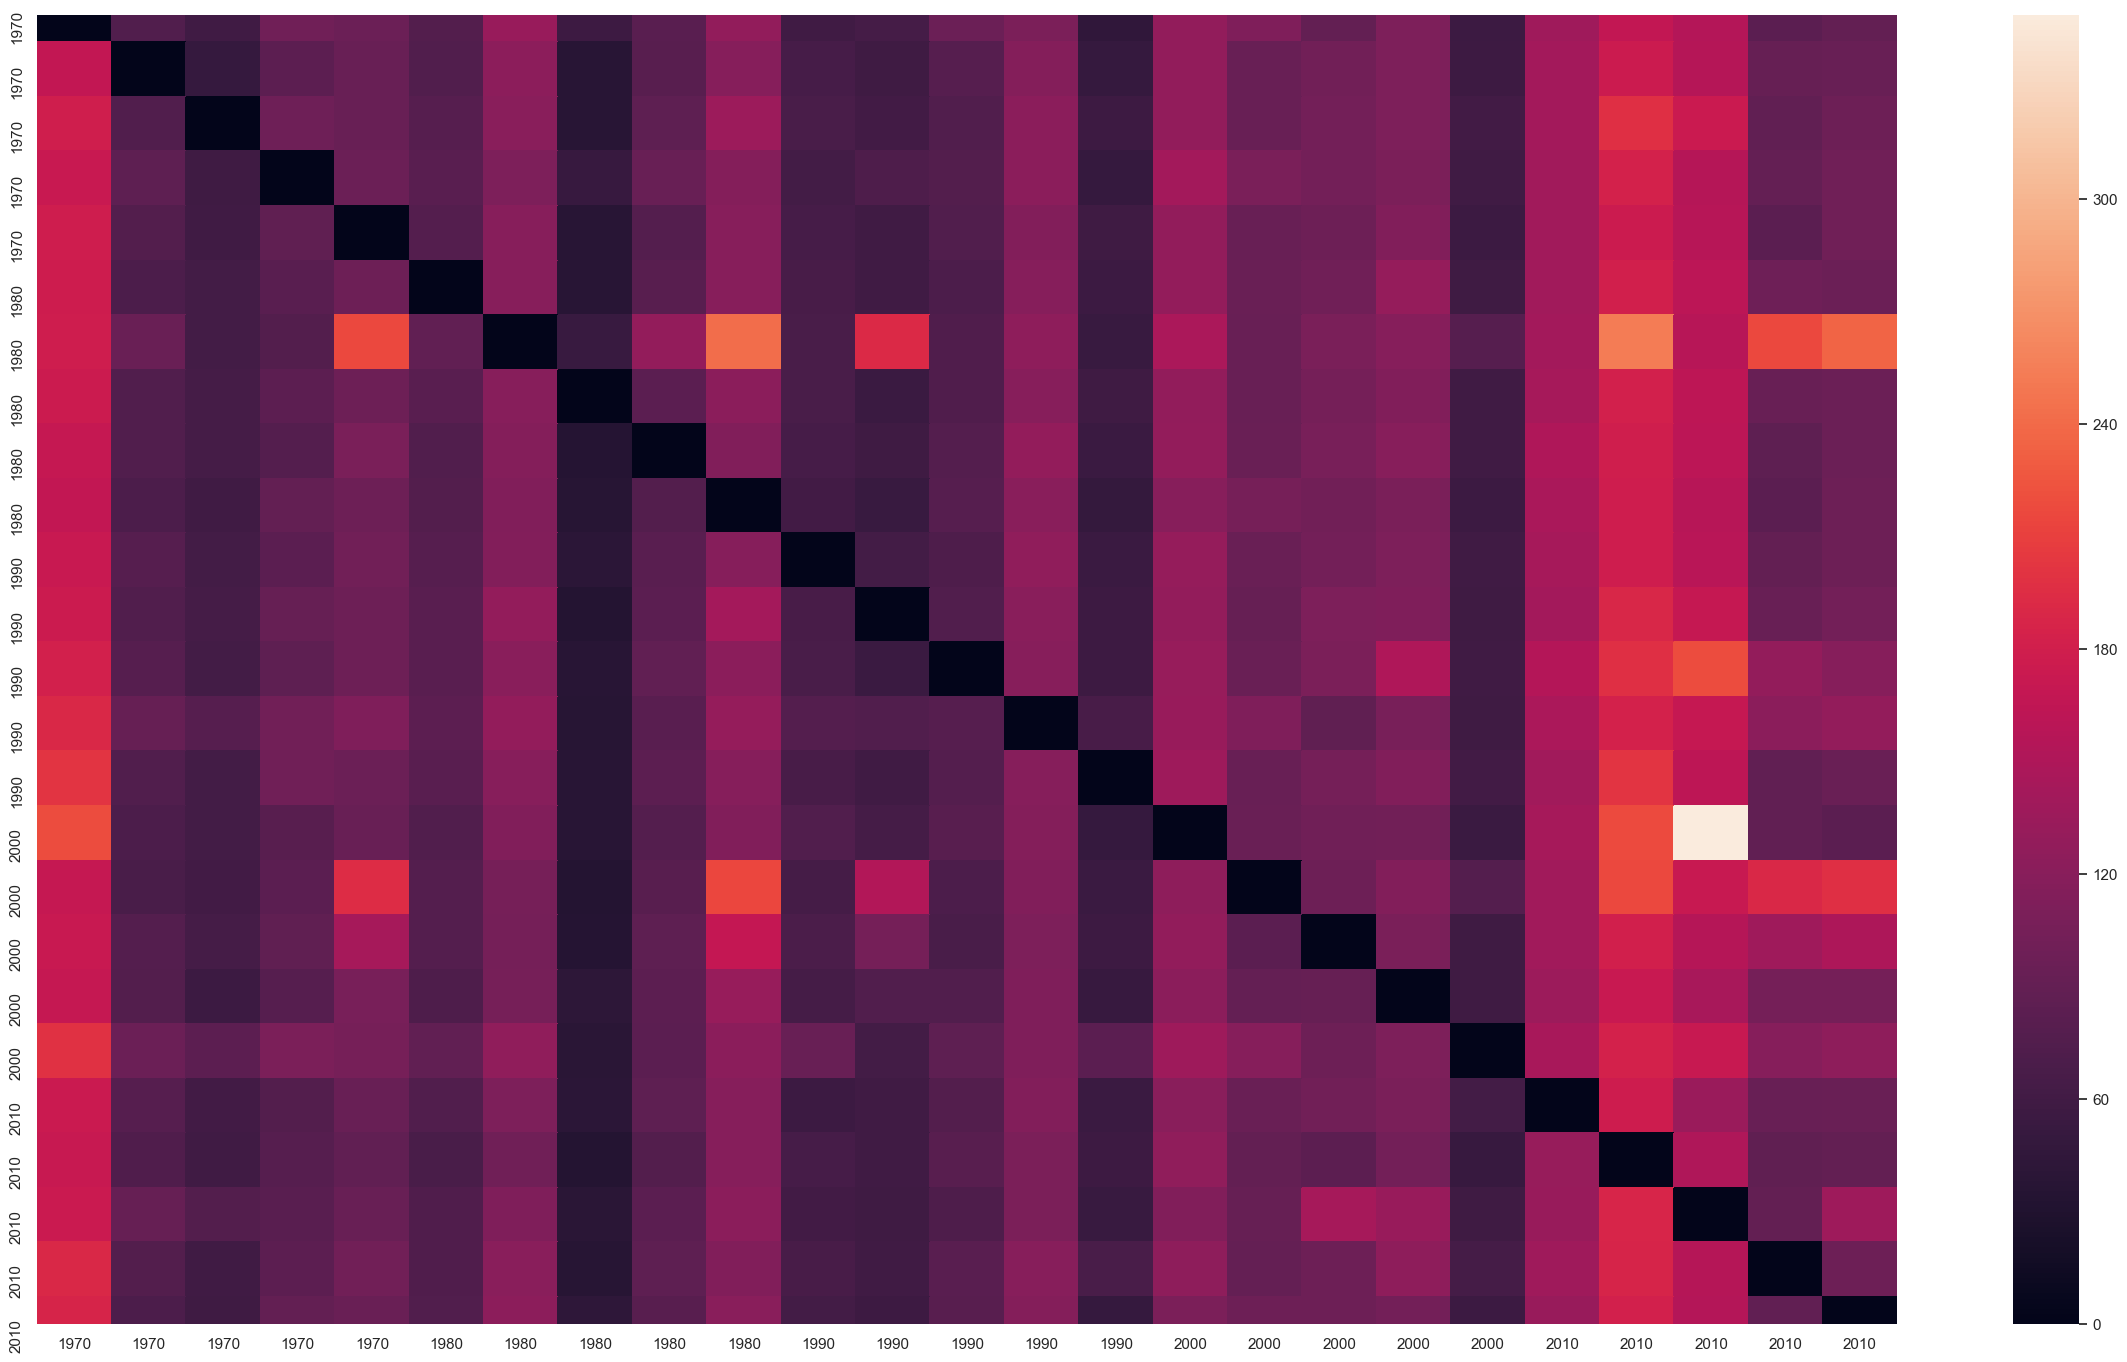

In [48]:
# chi 2
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

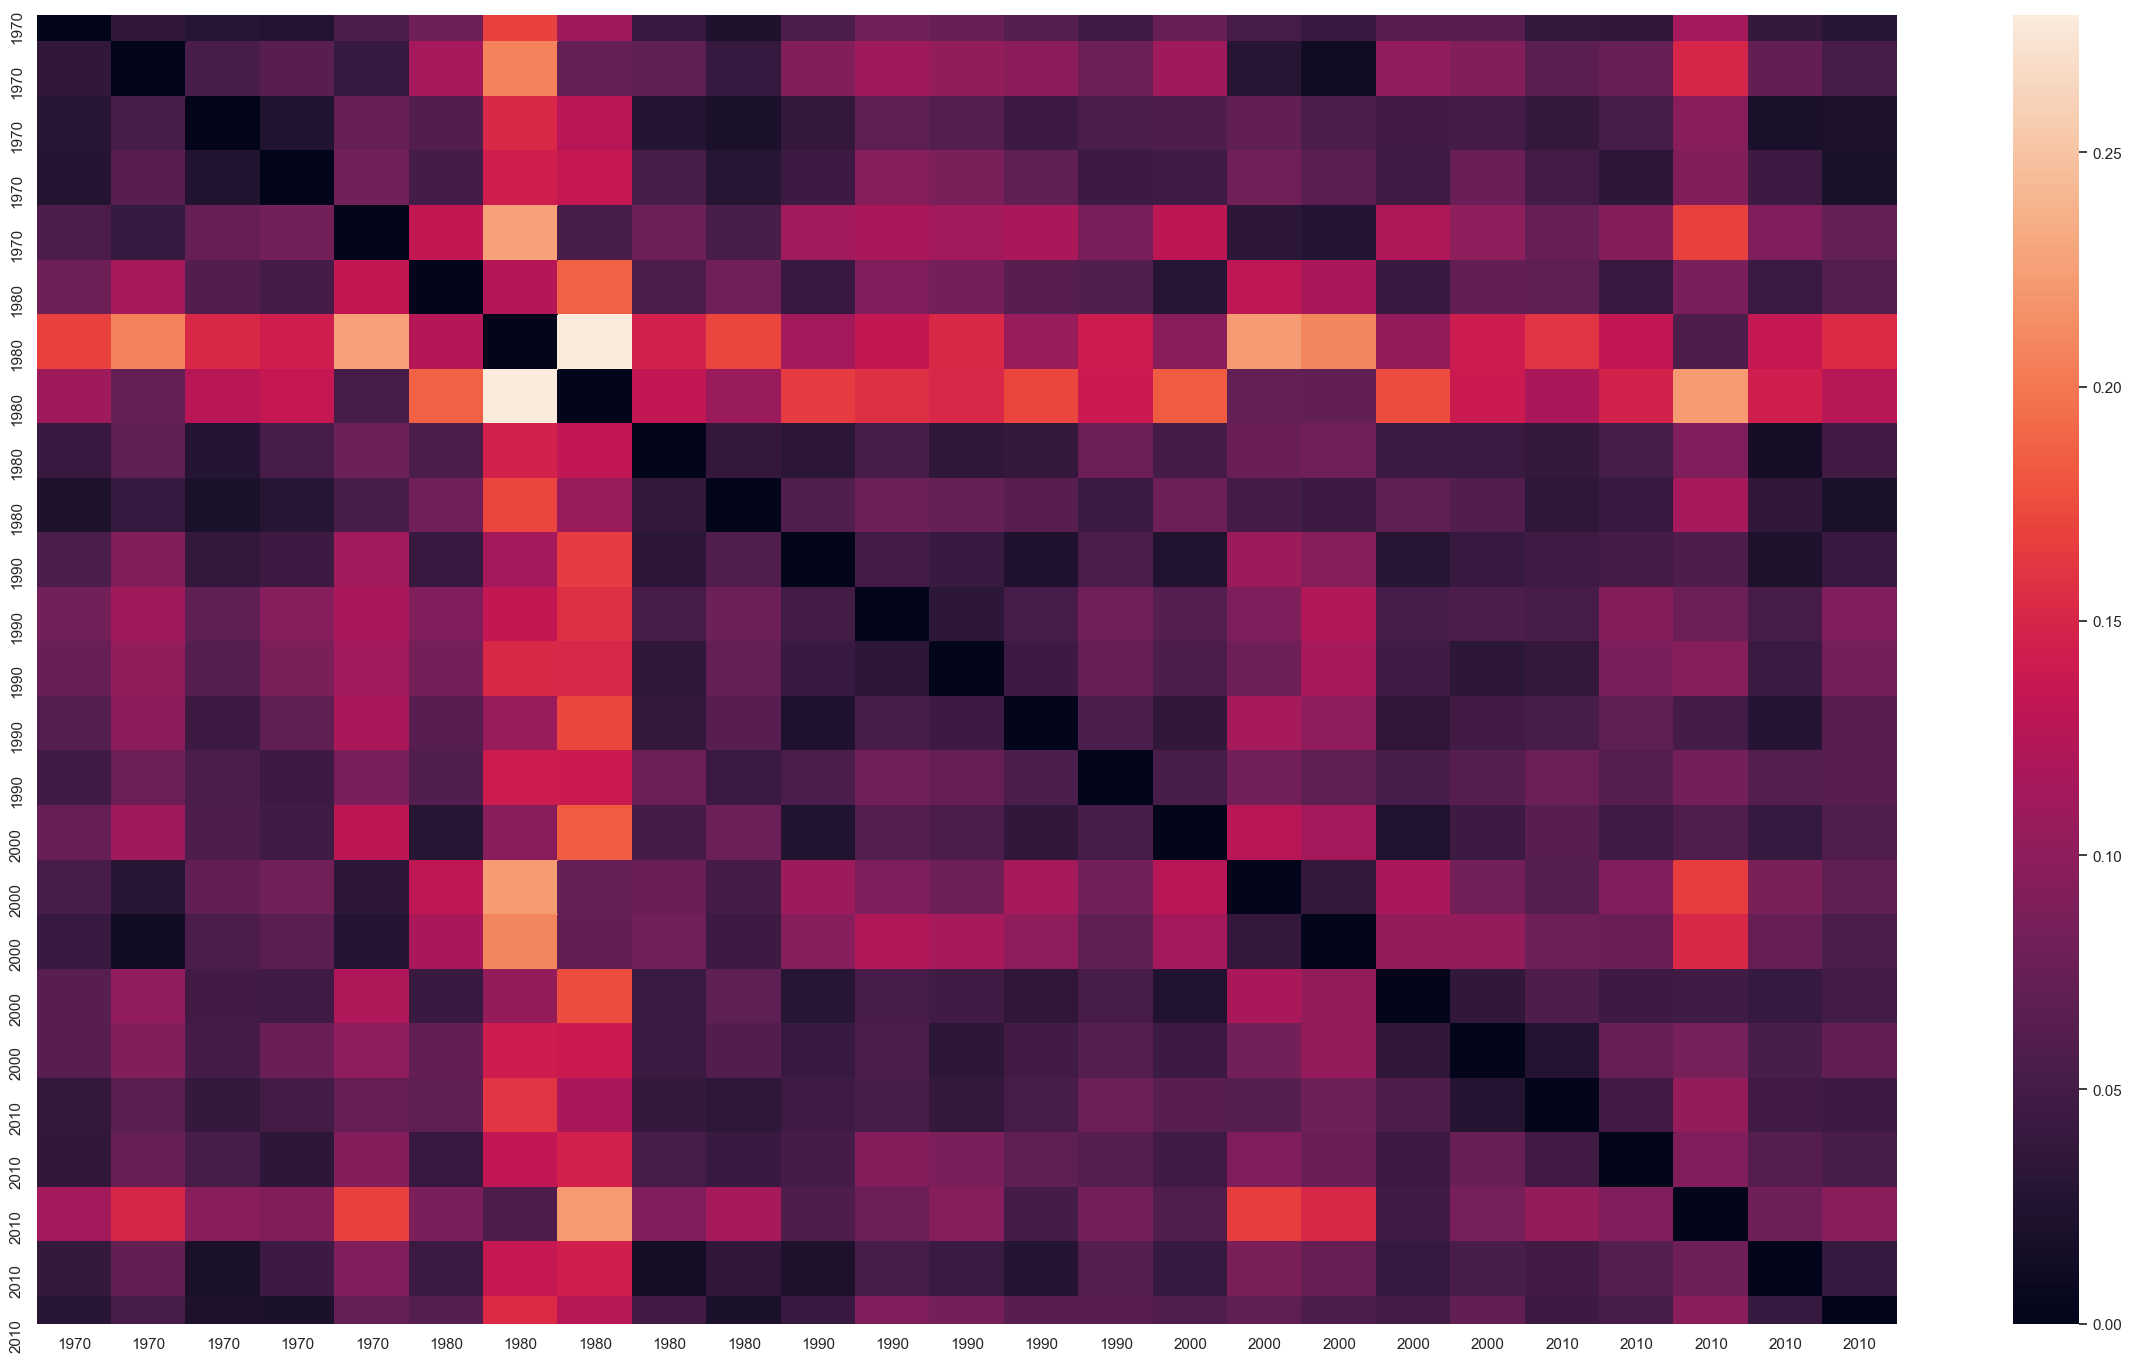

In [49]:
#For the KS distance:

L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()